In [1]:
from sklearn.ensemble import RandomForestClassifier as RFC
from keras.layers import Dense, Dropout,Flatten
from keras.models import Sequential
from matplotlib import pyplot as plt
%matplotlib inline
import keras.utils
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# seed weights
np.random.seed(3)

In [3]:
# import dataset
data = pd.read_csv('mushrooms.csv', delimiter=',')

In [4]:
# encode labels as integers so the can be one-hot-encoded which takes int matrix
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)

# one-hot-encode string data (now type int)
ohe = preprocessing.OneHotEncoder(sparse=False)
data = ohe.fit_transform(data)

X = data[:, 1:23]
Y = data[:, 0:2]


In [5]:
# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=10)

In [6]:
# create model
model = Sequential()

model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16))
model.add(Dropout(0.2))
model.add(Dense(8))

model.add(Dropout(0.5))
model.add(Dense(2, input_dim=22,  activation='softmax'))

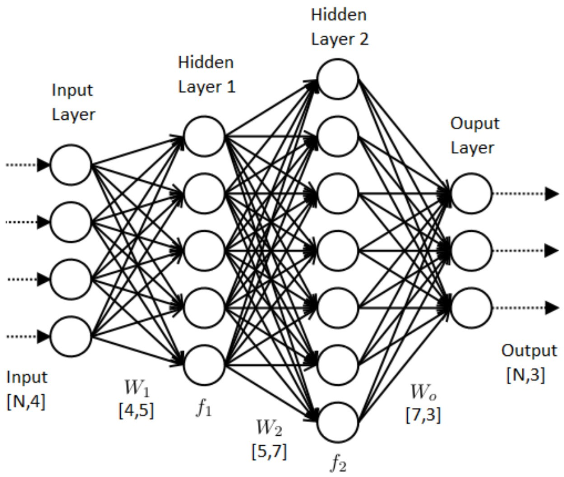

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 31.2000%


In [9]:
hist=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=128,validation_split=0.2)

Train on 6499 samples, validate on 1625 samples
Epoch 1/20
6499/6499 [==============================] - 0s 72us/step - loss: 0.3632 - acc: 0.6118 - val_loss: 0.2205 - val_acc: 0.9520
Epoch 2/20
6499/6499 [==============================] - 0s 18us/step - loss: 0.2181 - acc: 0.8446 - val_loss: 0.0701 - val_acc: 0.9692
Epoch 3/20
6499/6499 [==============================] - 0s 18us/step - loss: 0.1642 - acc: 0.8786 - val_loss: 0.0399 - val_acc: 0.9994
Epoch 4/20
6499/6499 [==============================] - 0s 18us/step - loss: 0.1341 - acc: 0.8640 - val_loss: 0.0419 - val_acc: 0.9114
Epoch 5/20
6499/6499 [==============================] - 0s 18us/step - loss: 0.1285 - acc: 0.8578 - val_loss: 0.0271 - val_acc: 0.9354
Epoch 6/20
6499/6499 [==============================] - 0s 19us/step - loss: 0.1331 - acc: 0.8480 - val_loss: 0.0313 - val_acc: 0.8898
Epoch 7/20
6499/6499 [==============================] - 0s 18us/step - loss: 0.1183 - acc: 0.8394 - val_loss: 0.0233 - val_acc: 0.9188
Epoch 8

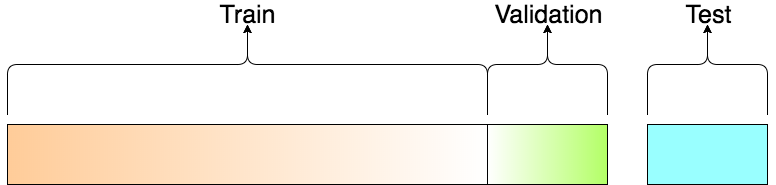

In [10]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 90.0308%


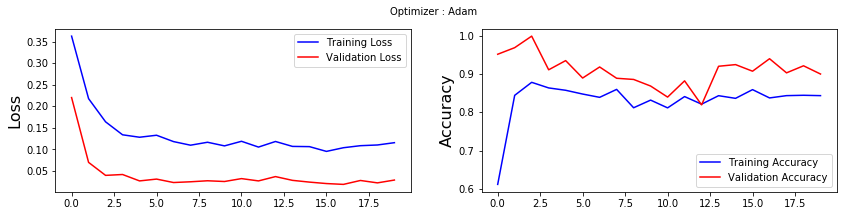

In [11]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()